# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [147]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [148]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [149]:
print(f"Rows and columns: { data.shape[0]} rows, {data.shape[1] } columns")
print(f"NaN values? { data.isna().values.any() }")
print(f"Duplicate rows? { data.duplicated().values.any() }")
print(f"# duplictated rows: { len(data[data.duplicated()]) }")
print(f"Data types: { data.dtypes }")

Rows and columns: 5391 rows, 6 columns
NaN values? False
Duplicate rows? False
# duplictated rows: 0
Data types: Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [151]:
data["USD_Production_Budget"] = data["USD_Production_Budget"].astype(str).str.replace("$", "")
data["USD_Production_Budget"] = data["USD_Production_Budget"].astype(str).str.replace(",", "")
data["USD_Production_Budget"] = pd.to_numeric(data["USD_Production_Budget"])

data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].astype(str).str.replace("$", "")
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].astype(str).str.replace(",", "")
data["USD_Worldwide_Gross"] = pd.to_numeric(data["USD_Worldwide_Gross"])

data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].astype(str).str.replace("$", "")
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].astype(str).str.replace(",", "")
data["USD_Domestic_Gross"] = pd.to_numeric(data["USD_Domestic_Gross"])

data.head()

C:\Users\GARRET~1.BEC\AppData\Local\Temp/ipykernel_10764/369176092.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["USD_Production_Budget"] = data["USD_Production_Budget"].astype(str).str.replace("$", "")
C:\Users\GARRET~1.BEC\AppData\Local\Temp/ipykernel_10764/369176092.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].astype(str).str.replace("$", "")
C:\Users\GARRET~1.BEC\AppData\Local\Temp/ipykernel_10764/369176092.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings wh

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [152]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [154]:
print(f"1) ${data['USD_Production_Budget'].mean()}")
print(f"2) ${data['USD_Worldwide_Gross'].mean()}")
print(f"3a) ${data['USD_Worldwide_Gross'].min()}")
print(f"3b) ${data['USD_Domestic_Gross'].min()}")

1) $31113737.57837136
2) $88855421.96271564
3a) $0
3b) $0


In [155]:
print("1, 2, 3, 4, 5)")
data.describe()

1, 2, 3, 4, 5)


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [156]:
print(f"6a) Lowest production budget: {data[data['USD_Production_Budget'] == 1100]['Movie_Title']}")
print(f"6b) Highest production budget: {data[data['USD_Production_Budget'] == 425000000]['Movie_Title']}")

6a) Lowest production budget: 2427    My Date With Drew
Name: Movie_Title, dtype: object
6b) Highest production budget: 3529    Avatar
Name: Movie_Title, dtype: object


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [157]:
print(f"{data[data['USD_Domestic_Gross'] == 0]['Movie_Title'].count()} movies grossed $0 domestically")

512 movies grossed $0 domestically


In [158]:
highest_budgeted_0_revenue = data[data['USD_Domestic_Gross'] == 0]
highest_budgeted_0_revenue.sort_values(by="USD_Production_Budget", ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [159]:
print(f"{data[data['USD_Worldwide_Gross'] == 0]['Movie_Title'].count()} movies grossed $0 worldwide")

357 movies grossed $0 worldwide


In [160]:
highest_budgeted_0_revenue_ww = data[data['USD_Worldwide_Gross'] == 0]
highest_budgeted_0_revenue_ww.sort_values(by="USD_Production_Budget", ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Filtering on Multiple Conditions

In [161]:
international_releases = data.loc[(data["USD_Domestic_Gross"] == 0) & (data["USD_Worldwide_Gross"] != 0)]
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [162]:
ir_new = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
print(f"Number of international releases: {len(ir_new)}")
ir_new.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [163]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [164]:
not_screened = data[data["Release_Date"] >= scrape_date]
print(f"{len(not_screened)} movies not yet screened")
not_screened.head(10)

7 movies not yet screened


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [165]:
data_clean = data.drop(not_screened.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [166]:
films_underperformed = data[data["USD_Worldwide_Gross"] < data["USD_Production_Budget"]]
print(f"{len(films_underperformed)} films underperformed")

print(f"{len(films_underperformed) / len(data) * 100}% of films underperformed")

2014 films underperformed
37.3585605639028% of films underperformed


# Seaborn for Data Viz: Bubble Charts

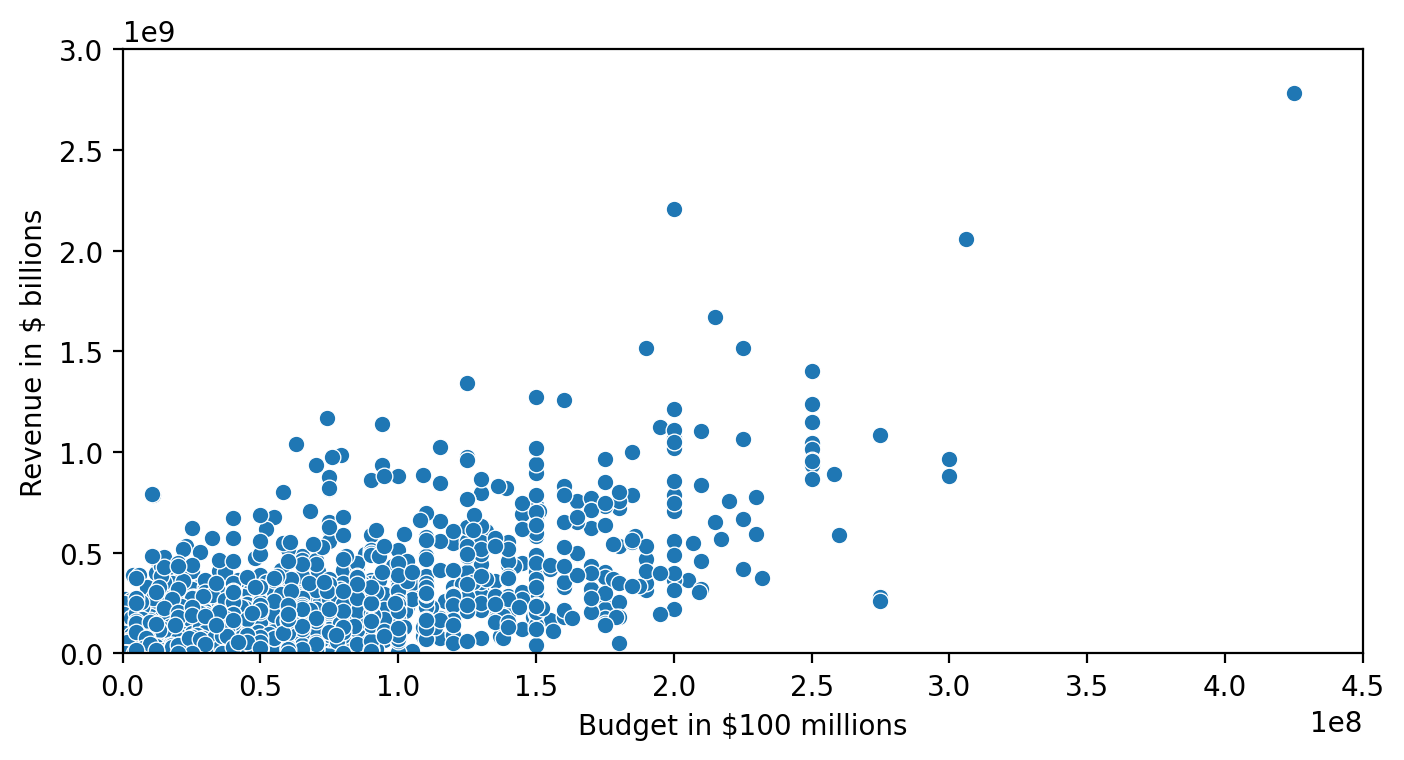

In [167]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(
    data=data_clean,
    x="USD_Production_Budget",
    y="USD_Worldwide_Gross"
)

ax.set(
    ylim=(0, 3000000000),
    xlim=(0, 450000000),
    ylabel="Revenue in $ billions",
    xlabel="Budget in $100 millions"
)

plt.show()

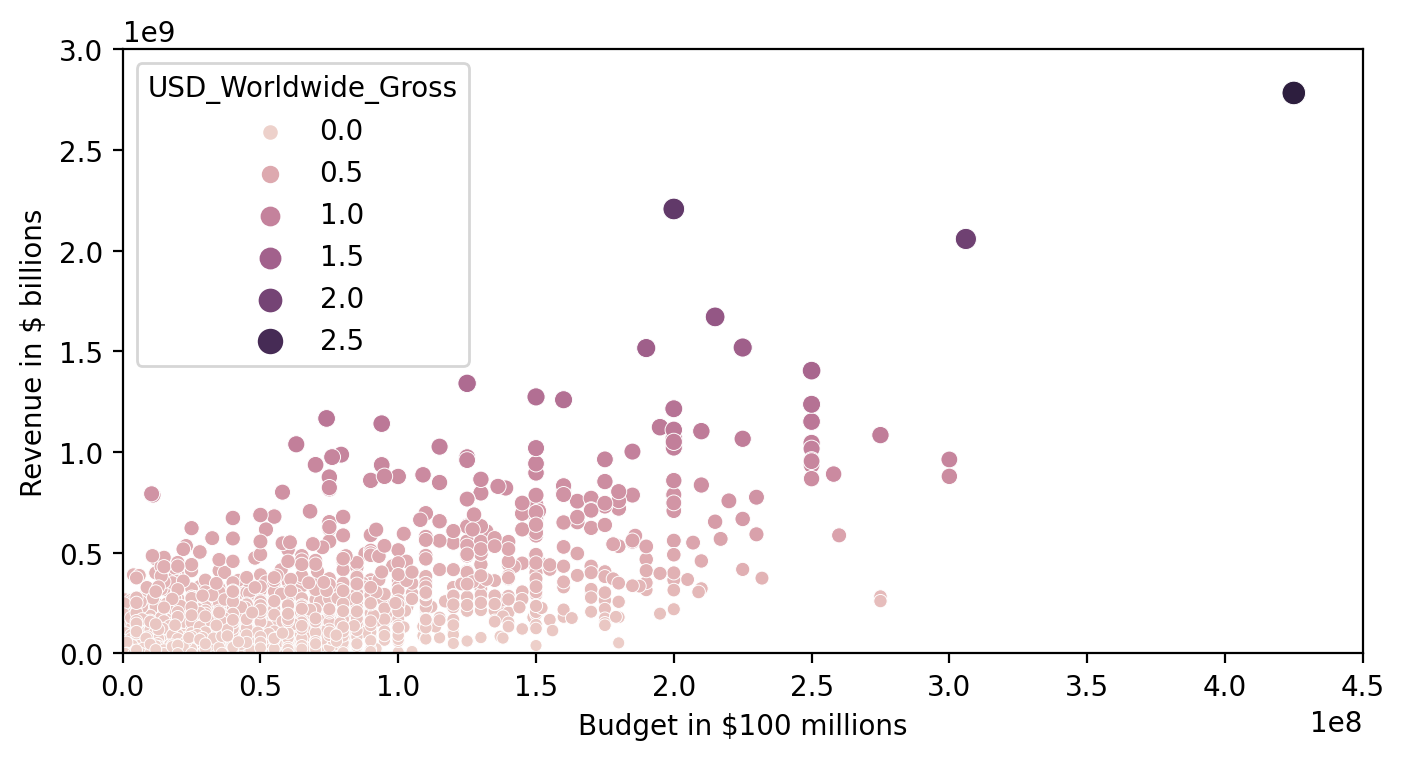

In [168]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(
    data=data_clean,
    x="USD_Production_Budget",
    y="USD_Worldwide_Gross",
    hue="USD_Worldwide_Gross", # color
    size="USD_Worldwide_Gross" # dot size
)

ax.set(
    ylim=(0, 3000000000),
    xlim=(0, 450000000),
    ylabel="Revenue in $ billions",
    xlabel="Budget in $100 millions"
)

plt.show()

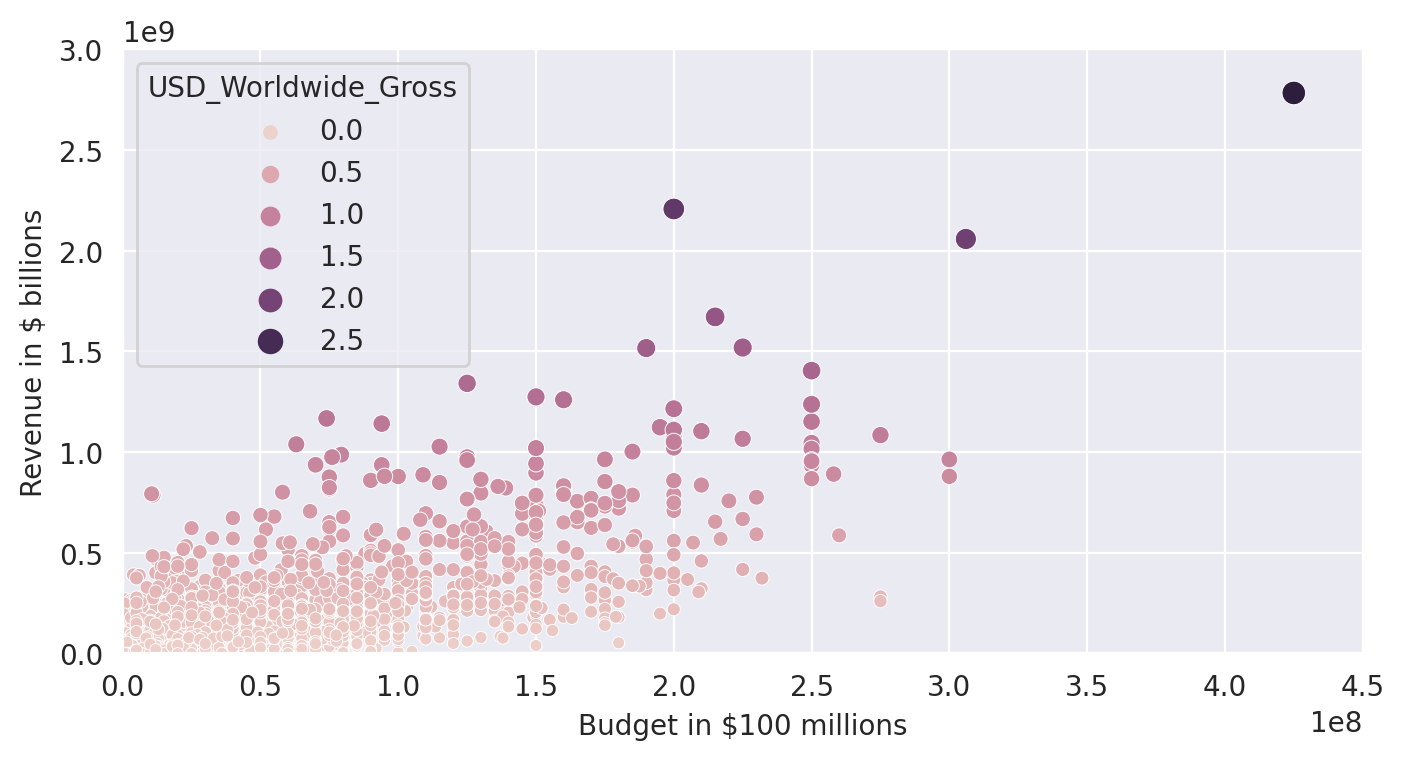

In [169]:
plt.figure(figsize=(8,4), dpi=200)

# Set styling on a single chart
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(
        data=data_clean,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        hue="USD_Worldwide_Gross", # color
        size="USD_Worldwide_Gross" # dot size
    )

    ax.set(
        ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel="Revenue in $ billions",
        xlabel="Budget in $100 millions"
    )

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



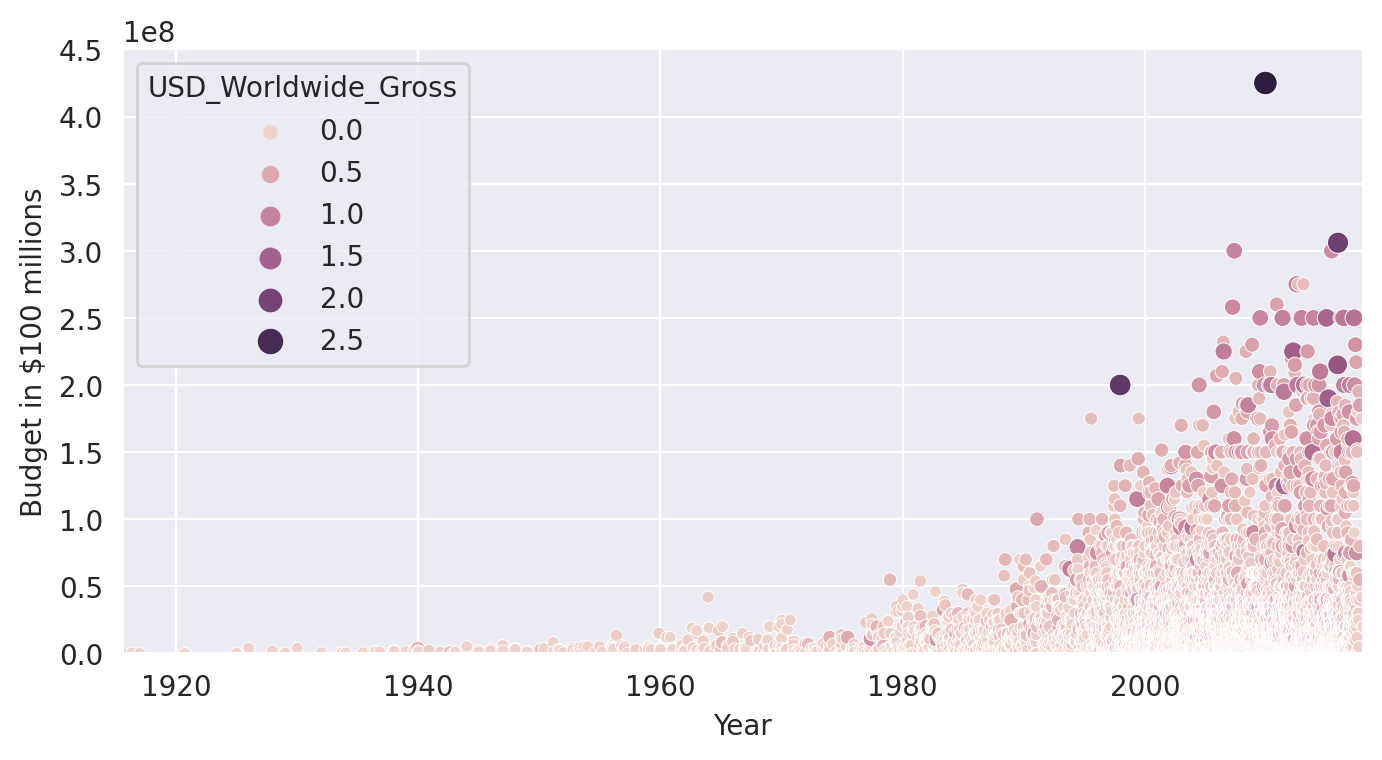

In [170]:
plt.figure(figsize=(8,4), dpi=200)

# Set styling on a single chart
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(
        data=data_clean,
        x="Release_Date",
        y="USD_Production_Budget",
        hue="USD_Worldwide_Gross", # color
        size="USD_Worldwide_Gross" # dot size
    )

    ax.set(
        ylim=(0, 450000000),
        xlim=(data_clean["Release_Date"].min(), data_clean["Release_Date"].max()),
        ylabel="Budget in $100 millions",
        xlabel="Year"
    )

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [171]:
data_clean["Decade"] = 10*(pd.DatetimeIndex(data_clean["Release_Date"]).year // 10)

data_clean.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,1920
6,4630,1927-12-08,Wings,2000000,0,0,1920
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000,1920
8,4240,1930-01-01,Hell's Angels,4000000,0,0,1930
9,5043,1931-12-31,Mata Hari,558000,900000,900000,1930


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [172]:
old_films = data_clean[data_clean["Decade"] < 1970]
new_films = data_clean[data_clean["Decade"] >= 1970]

print(f"{len(old_films)} films released prior to 1970")

max_budget_old = old_films['USD_Production_Budget'].max() 
print(f"{old_films[old_films['USD_Production_Budget'] == max_budget_old]['Movie_Title']} was the most expensive film made prior to 1970")

153 films released prior to 1970
109    Cleopatra
Name: Movie_Title, dtype: object was the most expensive film made prior to 1970


# Seaborn Regression Plots

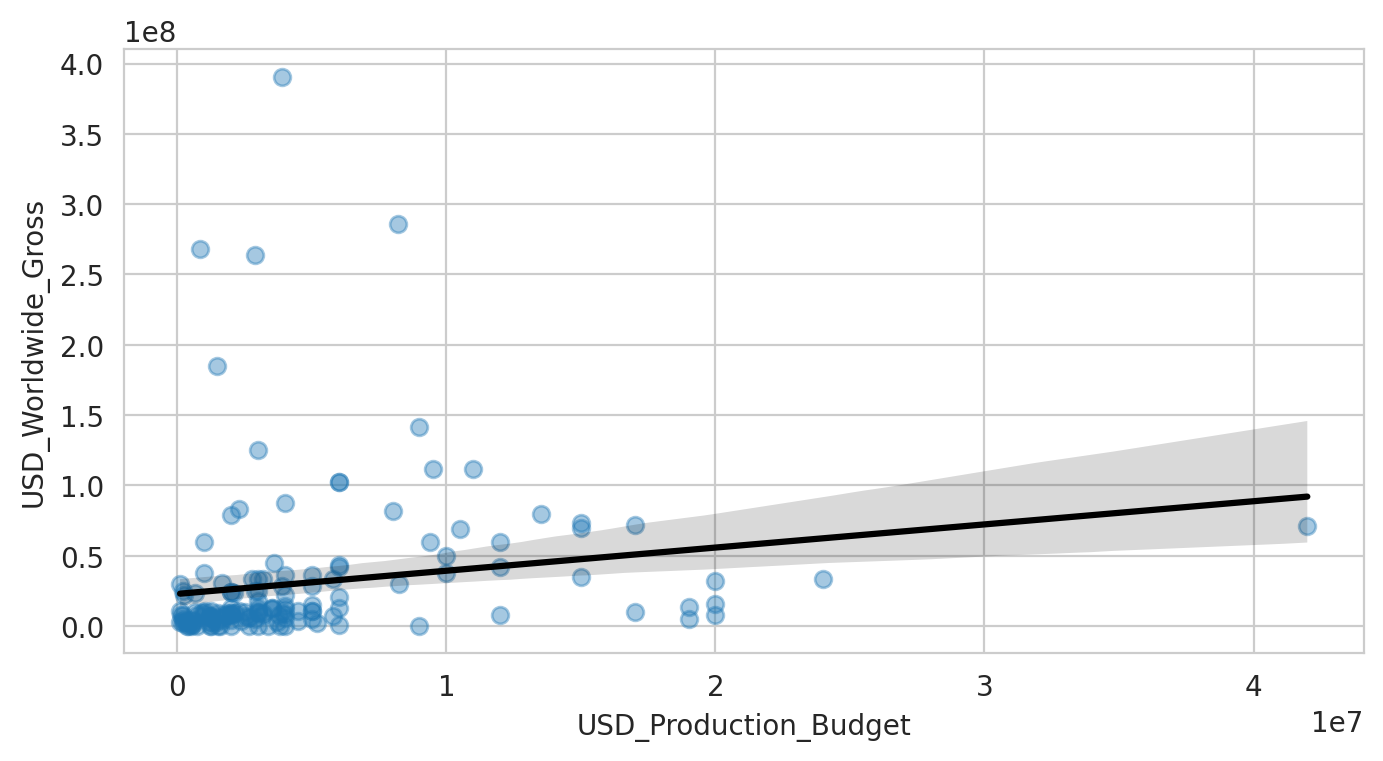

In [173]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(
        data=old_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        scatter_kws = {"alpha": 0.4},
        line_kws = {"color": "black"}
    )

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

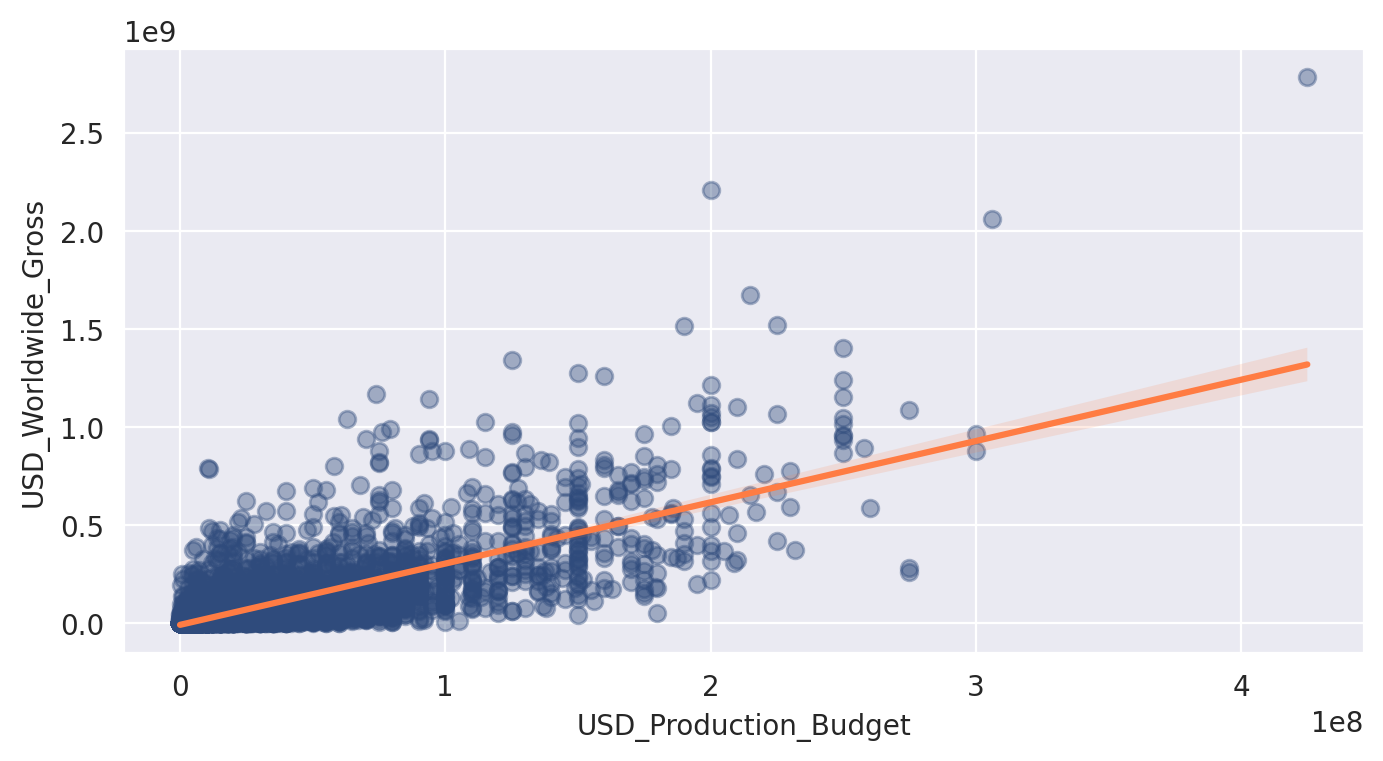

In [174]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    sns.regplot(
        data=new_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        color="#2f4b7c",
        scatter_kws = {"alpha": 0.4},
        line_kws = {"color": "#ff7c43"}
    )
    
    ax.set(
        ylim=(0, 300000000),
        xlim=(0, 500000000),
        ylabel="Revenue in billions",
        xlabel="Budget in millions"
    )
    
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [195]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
x = pd.DataFrame(new_films, columns=["USD_Production_Budget"])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

# Find the best fit line
regression.fit(x, y)

new_film_intercept = regression.intercept_[0]
new_film_coefficient = regression.coef_[0][0]
new_film_r_square = regression.score(x,y)

print(f"Intercept: {new_film_intercept}")
print(f"Slope Coefficient: {new_film_coefficient}")
print(f"R-Squared: {new_film_r_square}")

Intercept: -8650768.006610245
Slope Coefficient: 3.122595917321092
R-Squared: 0.5577032617720403


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [196]:
# Explanatory Variable(s) or Feature(s)
x = pd.DataFrame(old_films, columns=["USD_Production_Budget"])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

# Find the best fit line
regression.fit(x, y)

old_film_intercept = regression.intercept_[0]
old_film_coefficient = regression.coef_[0][0]
old_film_r_square = regression.score(x,y)

print(f"Intercept: {old_film_intercept}")
print(f"Slope Coefficient: {old_film_coefficient}")
print(f"R-Squared: {old_film_r_square}")

Intercept: 22821538.635080382
Slope Coefficient: 1.647713144010732
R-Squared: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [198]:
budget = 350000000
estimate = new_film_intercept + new_film_coefficient * 350000000
print(f"${estimate}")

$1084257803.055772
